# Initialization

In [1]:
import blackhc.notebook

Appended /home/adibi/rmg7/MIP/BatchBALD/src to paths
Switched to directory /home/adibi/rmg7/MIP/BatchBALD
%load_ext autoreload
%autoreload 2


In [2]:
import torch

In [3]:
import al_notebook.results_loader as rl
import al_notebook.plots as alp
from acquisition_functions import AcquisitionFunction
from acquisition_method import AcquisitionMethod
from dataset_enum import DatasetEnum

In [4]:
import numpy as np
import itertools

In [5]:
import prettyprinter as pp

In [6]:
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

In [8]:
#MARKERS = ("X", "s", "o")
MARKERS = None

# Binary COVID Results

In [9]:
def acc_label_axes(metric):
    plt.xlabel('Acquired dataset size')
    plt.ylabel(metric)

In [10]:
stores = rl.load_experiment_results('EMORY_COVID/binary')

In [11]:
stores.keys()

dict_keys(['EMORY_COVID/binary/covid_full_resnet_binary_scratch_entropy_58.py', 'EMORY_COVID/binary/covid_full_resnet_binary_scratch_entropy_254.py', 'EMORY_COVID/binary/covid_full_resnet_binary_scratch_entropy_1234.py', 'EMORY_COVID/binary/covid_full_resnet_binary_scratch_entropy_4321.py', 'EMORY_COVID/binary/covid_full_resnet_binary_scratch_entropy_8888.py', 'EMORY_COVID/binary/covid_full_resnet_binary_scratch_entropy_9031.py', 'EMORY_COVID/binary/covid_full_resnet_binary_scratch_lc_58.py', 'EMORY_COVID/binary/covid_full_resnet_binary_scratch_lc_254.py', 'EMORY_COVID/binary/covid_full_resnet_binary_scratch_lc_1234.py', 'EMORY_COVID/binary/covid_full_resnet_binary_scratch_lc_4321.py', 'EMORY_COVID/binary/covid_full_resnet_binary_scratch_lc_8888.py', 'EMORY_COVID/binary/covid_full_resnet_binary_scratch_lc_9031.py', 'EMORY_COVID/binary/covid_full_resnet_binary_scratch_meanstd_58.py', 'EMORY_COVID/binary/covid_full_resnet_binary_scratch_meanstd_254.py', 'EMORY_COVID/binary/covid_full_res

In [12]:
pp.pprint(rl.get_any(stores).args)

al_notebook.results_loader._args(
    experiment_description='COVID BINARY:RESNET BN DROPOUT ENTROPY (SCRATCH)',
    batch_size=16,
    scoring_batch_size=32,
    test_batch_size=64,
    validation_set_size=500,
    early_stopping_patience=3,
    epochs=30,
    epoch_samples=5056,
    num_inference_samples=100,
    available_sample_k=20,
    target_num_acquired_samples=1000,
    target_accuracy=0.9375,
    quickquick=False,
    seed=58,
    log_interval=20,
    initial_samples_per_class=25,
    initial_samples=None,
    balanced_validation_set=False,
    balanced_test_set=False,
    no_cuda=False,
    experiment_task_id='covid_full_resnet_binary_scratch_entropy_58',
    experiments_laaos='./experiment_configs/EMORY_COVID/scratch_binary_config.py',
    type=acquisition_functions.AcquisitionFunction.entropy_sampling,
    acquisition_method=acquisition_method.AcquisitionMethod.independent,
    dataset=dataset_enum.DatasetEnum.covid_binary
)


In [13]:
pp.pprint(rl.diff_args(stores))

{
    'experiment_description': {
        'COVID BINARY:RESNET BN DROPOUT RANDOM (SCRATCH)',
        'COVID BINARY:RESNET BN DROPOUT MARGIN SAMPLING (SCRATCH)',
        'COVID BINARY:RESNET BN DROPOUT ENTROPY (SCRATCH)',
        'COVID BINARY:RESNET BN DROPOUT MULTI BALD (SCRATCH)',
        'COVID BINARY:RESNET BN DROPOUT VARIATIONAL RATIOS (SCRATCH)',
        'COVID BINARY:RESNET BN DROPOUT LEAST CONFIDENCE (SCRATCH)',
        'COVID BINARY:RESNET BN DROPOUT MEAN STD (SCRATCH)'
    },
    'type': {
        acquisition_functions.AcquisitionFunction.random,
        acquisition_functions.AcquisitionFunction.mean_stddev,
        acquisition_functions.AcquisitionFunction.entropy_sampling,
        acquisition_functions.AcquisitionFunction.variation_ratios,
        acquisition_functions.AcquisitionFunction.least_confidence,
        acquisition_functions.AcquisitionFunction.margin_sampling,
        acquisition_functions.AcquisitionFunction.bald
    },
    'acquisition_method': {
        acqui

In [14]:
stores.keys()

dict_keys(['EMORY_COVID/binary/covid_full_resnet_binary_scratch_entropy_58.py', 'EMORY_COVID/binary/covid_full_resnet_binary_scratch_entropy_254.py', 'EMORY_COVID/binary/covid_full_resnet_binary_scratch_entropy_1234.py', 'EMORY_COVID/binary/covid_full_resnet_binary_scratch_entropy_4321.py', 'EMORY_COVID/binary/covid_full_resnet_binary_scratch_entropy_8888.py', 'EMORY_COVID/binary/covid_full_resnet_binary_scratch_entropy_9031.py', 'EMORY_COVID/binary/covid_full_resnet_binary_scratch_lc_58.py', 'EMORY_COVID/binary/covid_full_resnet_binary_scratch_lc_254.py', 'EMORY_COVID/binary/covid_full_resnet_binary_scratch_lc_1234.py', 'EMORY_COVID/binary/covid_full_resnet_binary_scratch_lc_4321.py', 'EMORY_COVID/binary/covid_full_resnet_binary_scratch_lc_8888.py', 'EMORY_COVID/binary/covid_full_resnet_binary_scratch_lc_9031.py', 'EMORY_COVID/binary/covid_full_resnet_binary_scratch_meanstd_58.py', 'EMORY_COVID/binary/covid_full_resnet_binary_scratch_meanstd_254.py', 'EMORY_COVID/binary/covid_full_res

### Binary Baseline

In [15]:
def round_down_to_nearest_5(number):
    """
    Rounds the given number down to the nearest multiple of 5.
    
    Parameters:
    number (float or int): The number to be rounded down.
    
    Returns:
    int: The number rounded down to the nearest multiple of 5.
    """
    return 5 * np.floor(number / 5)

In [16]:
binary_baseline = {'accuracy': 0.9375, 'nll': 0.4526682557730839, 'f1': 0.8538900048862588, 'precision': 0.9098557692307692, 'recall': 0.8155581260844419, 'ROC_AUC': 0.9107610725653014, 'PRC_AUC': 0.9895504989378878, 'specificity': 0.8629651050703682}
binary_baseline = {k:round(v*100,2) for k,v in binary_baseline.items()}
binary_baseline

{'accuracy': 93.75,
 'nll': 45.27,
 'f1': 85.39,
 'precision': 90.99,
 'recall': 81.56,
 'ROC_AUC': 91.08,
 'PRC_AUC': 98.96,
 'specificity': 86.3}

In [17]:
# this script basically creates baselines that are reasonable
# one baseline is from the no_al experiment run
# the other baseline is 3-9% lower just to get an idea
lower_binary_baseline = {}
threshold_key = 3
for k,v in binary_baseline.items():
    rounded_down = round_down_to_nearest_5(v)
    if abs(rounded_down - v) < threshold_key:
        rounded_down = round_down_to_nearest_5(rounded_down-1)

    lower_binary_baseline[k] = rounded_down

lower_binary_baseline

{'accuracy': 90.0,
 'nll': 40.0,
 'f1': 80.0,
 'precision': 85.0,
 'recall': 75.0,
 'ROC_AUC': 85.0,
 'PRC_AUC': 95.0,
 'specificity': 80.0}

## Binary Visualizations

### All the plots

{
    'experiment_description': {
        'COVID BINARY:RESNET BN DROPOUT RANDOM (SCRATCH)',
        'COVID BINARY:RESNET BN DROPOUT MARGIN SAMPLING (SCRATCH)',
        'COVID BINARY:RESNET BN DROPOUT ENTROPY (SCRATCH)',
        'COVID BINARY:RESNET BN DROPOUT MULTI BALD (SCRATCH)',
        'COVID BINARY:RESNET BN DROPOUT VARIATIONAL RATIOS (SCRATCH)',
        'COVID BINARY:RESNET BN DROPOUT LEAST CONFIDENCE (SCRATCH)',
        'COVID BINARY:RESNET BN DROPOUT MEAN STD (SCRATCH)'
    },
    'type': {
        acquisition_functions.AcquisitionFunction.random,
        acquisition_functions.AcquisitionFunction.mean_stddev,
        acquisition_functions.AcquisitionFunction.entropy_sampling,
        acquisition_functions.AcquisitionFunction.variation_ratios,
        acquisition_functions.AcquisitionFunction.least_confidence,
        acquisition_functions.AcquisitionFunction.margin_sampling,
        acquisition_functions.AcquisitionFunction.bald
    },
    'acquisition_method': {
        acqui

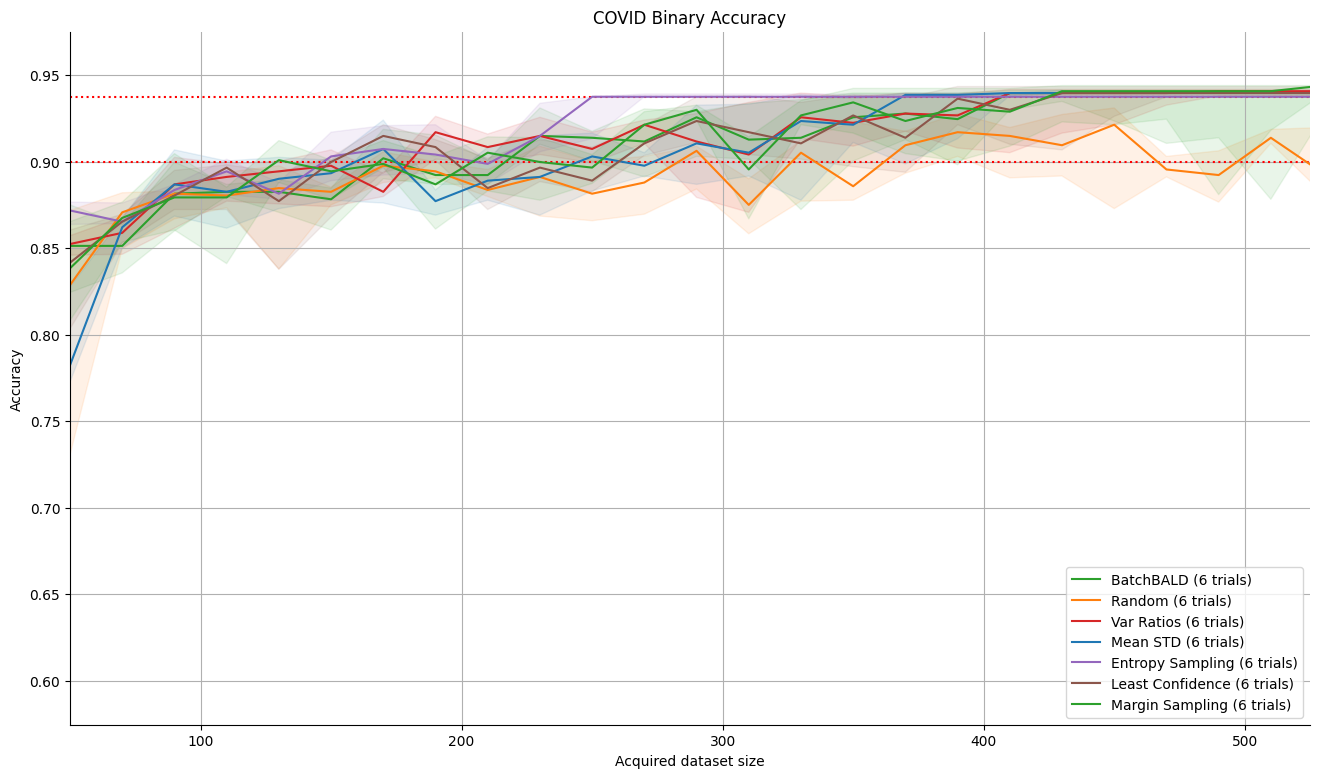

BatchBALD (6 trials):
80.0% at [150 150 170]
85.39% at [210 250 410]
Random (6 trials):
80.0% at [130 170 270]
85.39% at [290 430 690]
Var Ratios (6 trials):
80.0% at [110 170 170]
85.39% at [170 270 370]
Mean STD (6 trials):
80.0% at [ 70  70 150]
85.39% at [ 70 130 310]
Entropy Sampling (6 trials):
80.0% at [ 90 130 170]
85.39% at [210 230 250]
Least Confidence (6 trials):
80.0% at [ 90 150 170]
85.39% at [270 330 450]
Margin Sampling (6 trials):
80.0% at [110 130 250]
85.39% at [270 270 310]


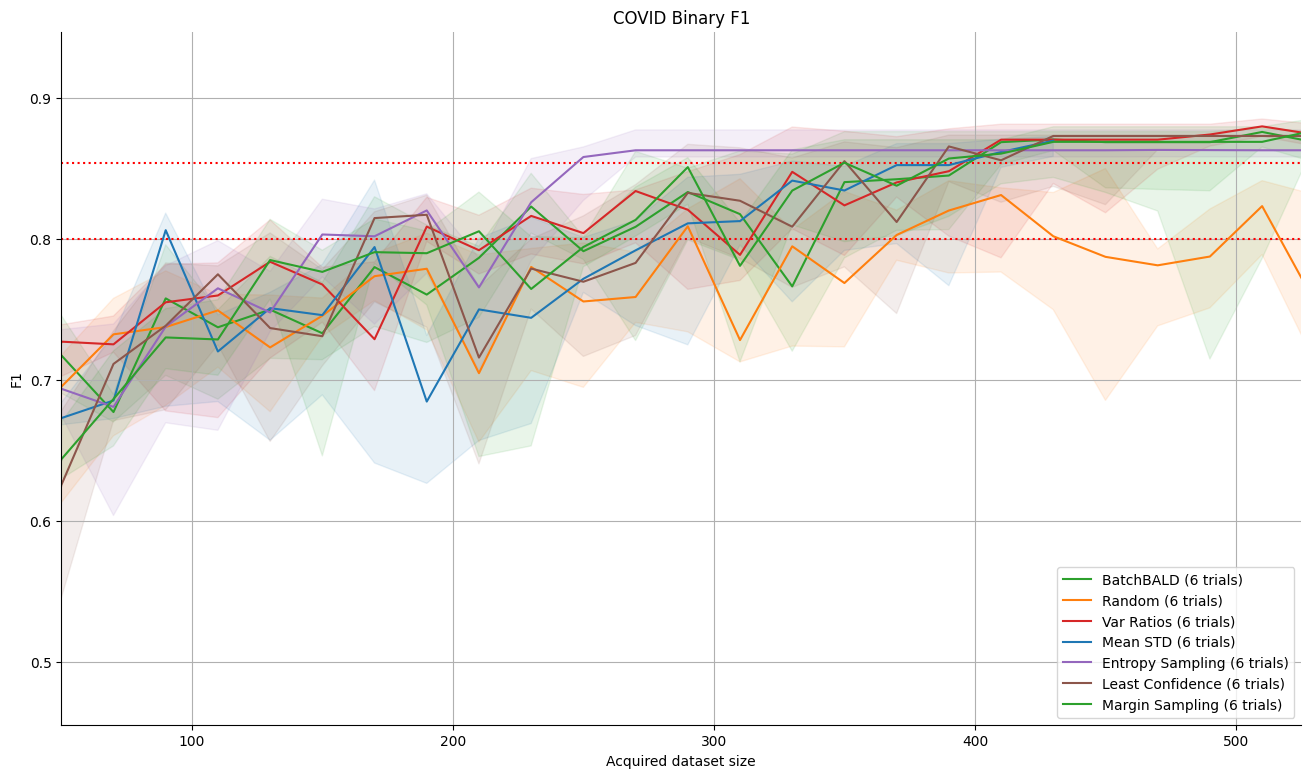

BatchBALD (6 trials):
85.0% at [130. 170. 210.]
90.99% at [290. 390.  inf]
Random (6 trials):
85.0% at [170. 250. 350.]
90.99% at [430.  inf  inf]
Var Ratios (6 trials):
85.0% at [130. 170. 170.]
90.99% at [290. 330.  inf]
Mean STD (6 trials):
85.0% at [130. 150. 210.]
90.99% at [150. 210.  inf]
Entropy Sampling (6 trials):
85.0% at [ 50. 130. 190.]
90.99% at [inf inf inf]
Least Confidence (6 trials):
85.0% at [130. 150. 170.]
90.99% at [230. 270.  inf]
Margin Sampling (6 trials):
85.0% at [ 70. 130. 250.]
90.99% at [210. 250.  inf]


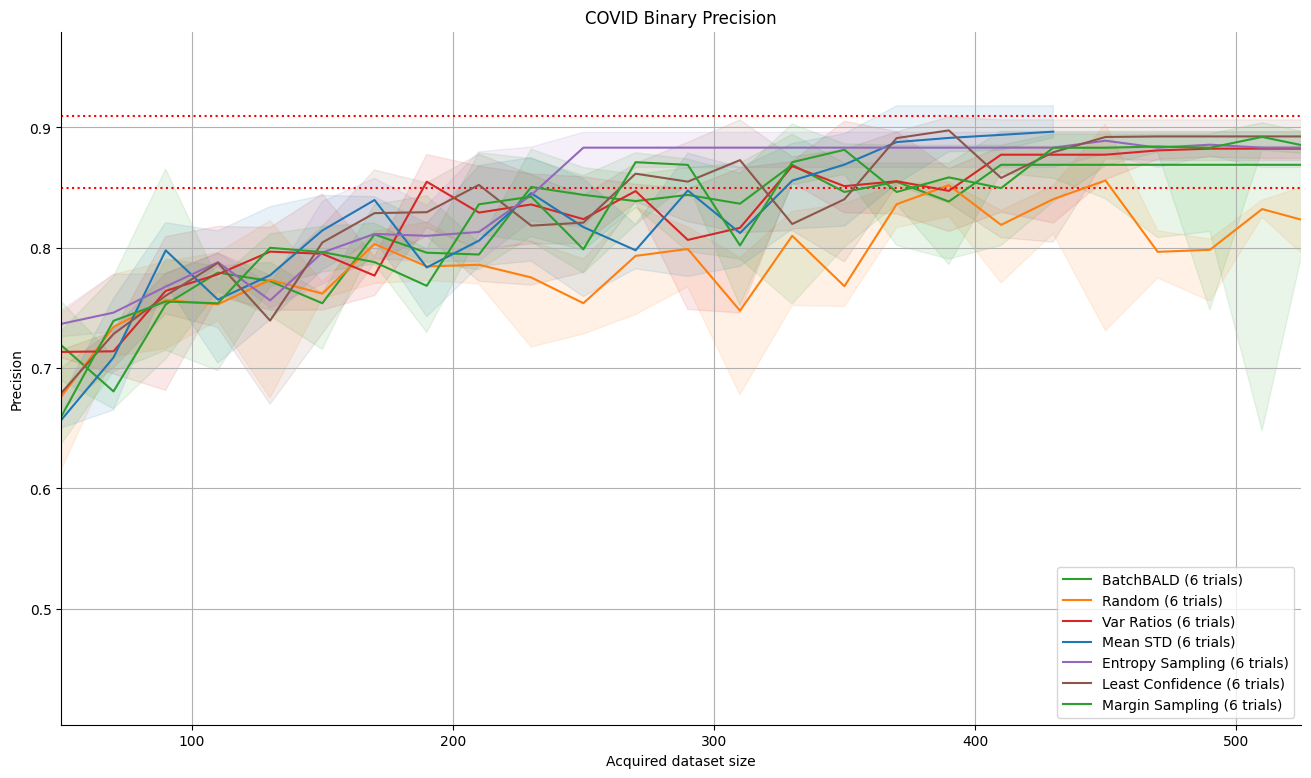

BatchBALD (6 trials):
75.0% at [  0   0 110]
81.56% at [110 110 130]
Random (6 trials):
75.0% at [ 0 50 90]
81.56% at [ 70  90 290]
Var Ratios (6 trials):
75.0% at [ 0  0 70]
81.56% at [ 90 110 190]
Mean STD (6 trials):
75.0% at [  0   0 150]
81.56% at [150 210 270]
Entropy Sampling (6 trials):
75.0% at [  0  50 130]
81.56% at [ 50  70 130]
Least Confidence (6 trials):
75.0% at [ 0 70 90]
81.56% at [ 70 110 130]
Margin Sampling (6 trials):
75.0% at [ 90  90 110]
81.56% at [130 150 190]


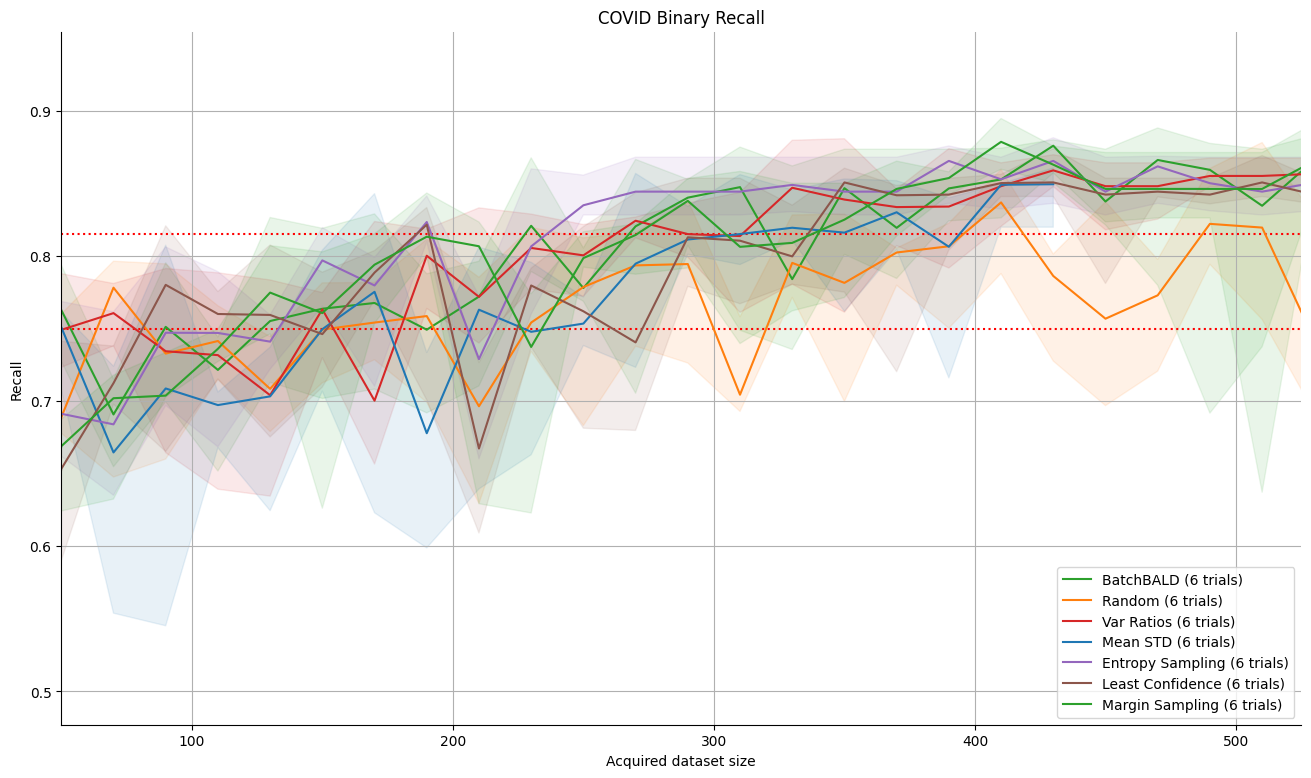

BatchBALD (6 trials):
85.0% at [ 0  0 90]
91.08% at [130 150 250]
Random (6 trials):
85.0% at [ 0 50 50]
91.08% at [ 90 170 330]
Var Ratios (6 trials):
85.0% at [ 0  0 70]
91.08% at [ 90  90 170]
Mean STD (6 trials):
85.0% at [ 70  90 130]
91.08% at [150 190 210]
Entropy Sampling (6 trials):
85.0% at [ 0 50 90]
91.08% at [130 130 190]
Least Confidence (6 trials):
85.0% at [50 70 70]
91.08% at [ 90 170 230]
Margin Sampling (6 trials):
85.0% at [50. 50. 70.]
91.08% at [ 90. 130. 250.]


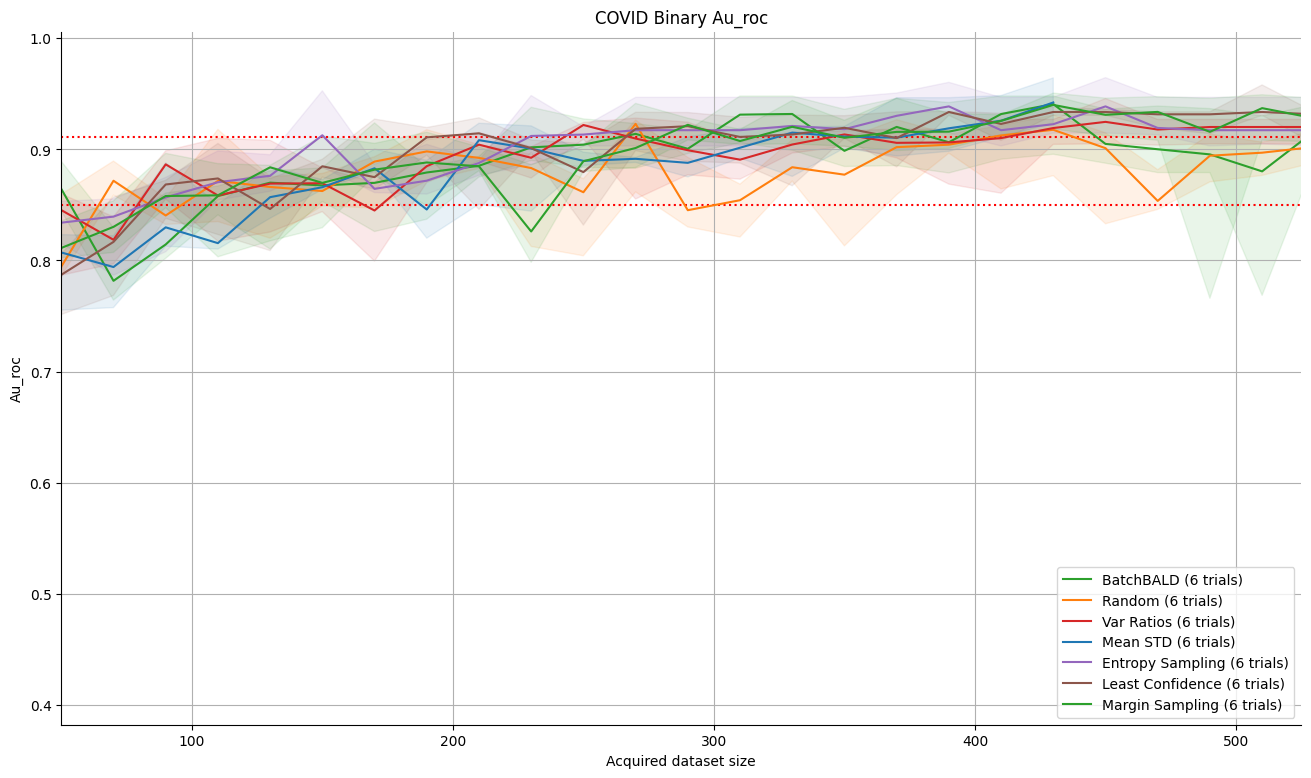

BatchBALD (6 trials):
95.0% at [0 0 0]
98.96% at [170 210 290]
Random (6 trials):
95.0% at [0. 0. 0.]
98.96% at [250. 290. 430.]
Var Ratios (6 trials):
95.0% at [0 0 0]
98.96% at [170 230 270]
Mean STD (6 trials):
95.0% at [0. 0. 0.]
98.96% at [190. 190. 290.]
Entropy Sampling (6 trials):
95.0% at [ 0.  0. 50.]
98.96% at [130. 150. 230.]
Least Confidence (6 trials):
95.0% at [ 0  0 50]
98.96% at [150 190 270]
Margin Sampling (6 trials):
95.0% at [0 0 0]
98.96% at [130 150 250]


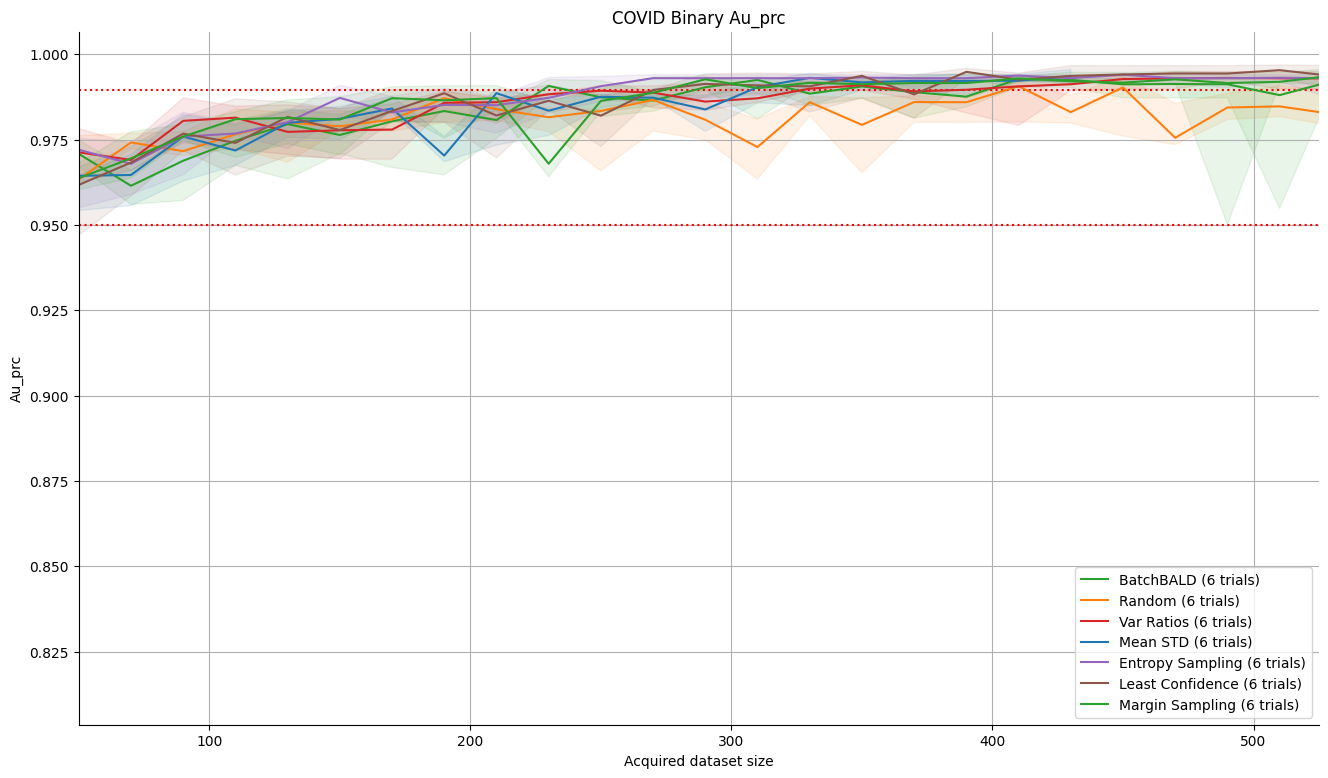

BatchBALD (6 trials):
40.0% at [0 0 0]
45.27% at [0 0 0]
Random (6 trials):
40.0% at [0 0 0]
45.27% at [0 0 0]
Var Ratios (6 trials):
40.0% at [0 0 0]
45.27% at [0 0 0]
Mean STD (6 trials):
40.0% at [0 0 0]
45.27% at [0 0 0]
Entropy Sampling (6 trials):
40.0% at [0 0 0]
45.27% at [0 0 0]
Least Confidence (6 trials):
40.0% at [0 0 0]
45.27% at [0 0 0]
Margin Sampling (6 trials):
40.0% at [0 0 0]
45.27% at [0 0 0]


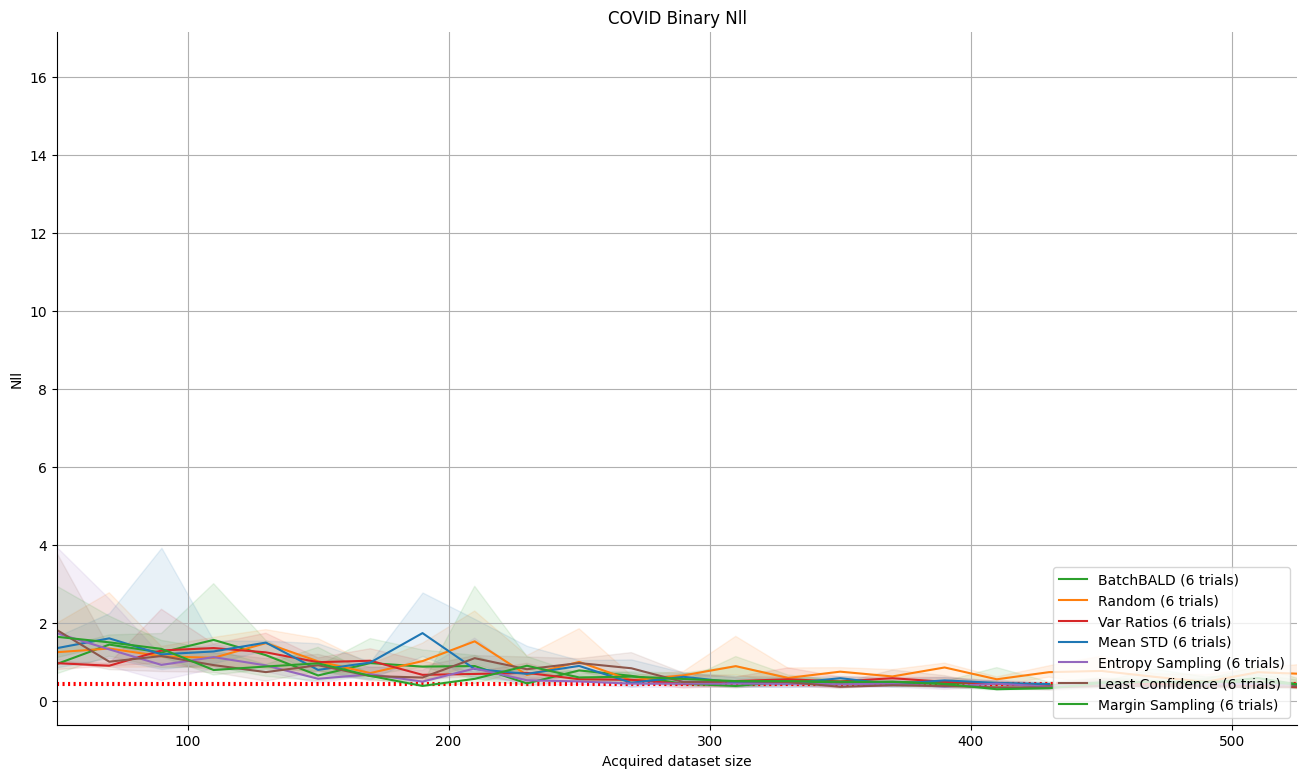

BatchBALD (6 trials):
75.0% at [  0   0 110]
81.56% at [110 110 130]
Random (6 trials):
75.0% at [ 0 50 90]
81.56% at [ 70  90 290]
Var Ratios (6 trials):
75.0% at [ 0  0 70]
81.56% at [ 90 110 190]
Mean STD (6 trials):
75.0% at [  0   0 150]
81.56% at [150 210 270]
Entropy Sampling (6 trials):
75.0% at [  0  50 130]
81.56% at [ 50  70 130]
Least Confidence (6 trials):
75.0% at [ 0 70 90]
81.56% at [ 70 110 130]
Margin Sampling (6 trials):
75.0% at [ 90  90 110]
81.56% at [130 150 190]


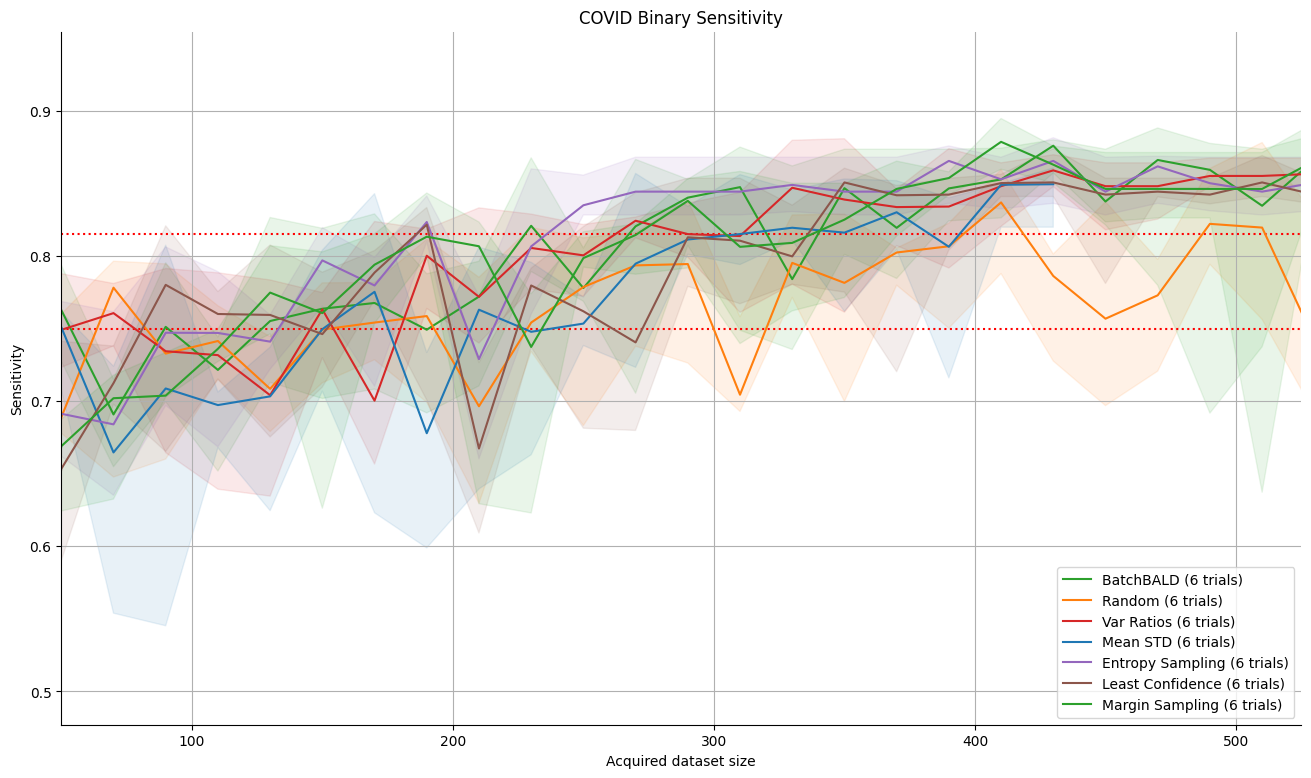

BatchBALD (6 trials):
80.0% at [130. 190. 250.]
86.3% at [470.  inf  inf]
Random (6 trials):
80.0% at [290. 310. 750.]
86.3% at [310. 610.  inf]
Var Ratios (6 trials):
80.0% at [190. 270. 370.]
86.3% at [inf inf inf]
Mean STD (6 trials):
80.0% at [ 90. 190. 270.]
86.3% at [inf inf inf]
Entropy Sampling (6 trials):
80.0% at [170. 370.  inf]
86.3% at [inf inf inf]
Least Confidence (6 trials):
80.0% at [110. 130. 330.]
86.3% at [210. 290.  inf]
Margin Sampling (6 trials):
80.0% at [110. 150. 170.]
86.3% at [170. 290.  inf]


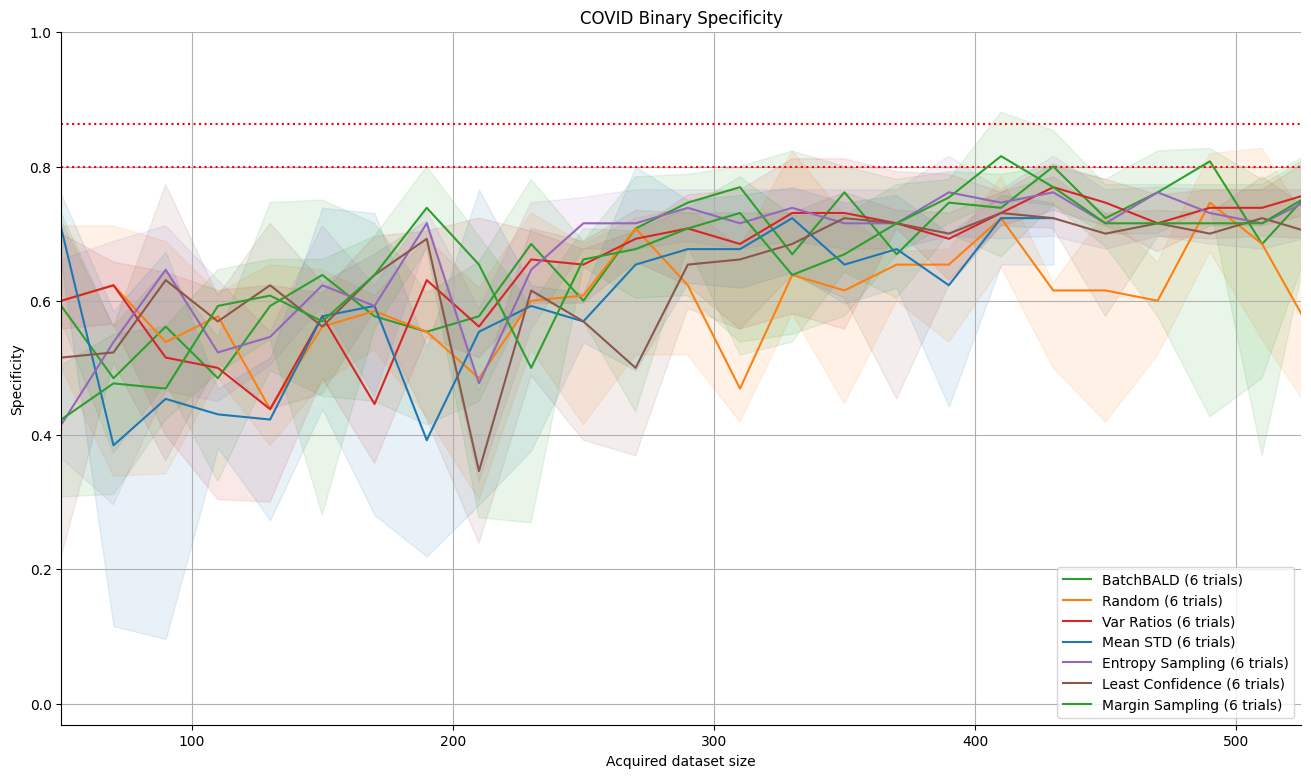

In [18]:
for show_b in (10, ):
    def filter_exps(name, store):
        vip_args = rl.get_vip_args(store)
        if vip_args.nis == 0:
            return False
        if (vip_args.am, vip_args.af) in [
            (AcquisitionMethod.multibald, AcquisitionFunction.bald),
            (AcquisitionMethod.independent, AcquisitionFunction.random),
            (AcquisitionMethod.independent, AcquisitionFunction.mean_stddev),
            (AcquisitionMethod.independent, AcquisitionFunction.variation_ratios),
            (AcquisitionMethod.independent, AcquisitionFunction.entropy_sampling),
            (AcquisitionMethod.independent, AcquisitionFunction.least_confidence),
            (AcquisitionMethod.independent, AcquisitionFunction.margin_sampling)
        ]:
            return True
        if vip_args.af != AcquisitionFunction.random:
            if vip_args.k not in (10, ) or vip_args.b not in (show_b, ):
                return False
        return True

    filtered = rl.filter_dict(stores, kv=filter_exps)
    pp.pprint(rl.diff_args(filtered))

    def key2text(name, store):
        vip_args = rl.get_vip_args(store)
        am, af = vip_args.am, vip_args.af
        key_map = {
            (AcquisitionMethod.independent, AcquisitionFunction.random): 'Random',
            (AcquisitionMethod.independent, AcquisitionFunction.bald): 'BALD',
            (AcquisitionMethod.independent, AcquisitionFunction.variation_ratios): 'Var Ratios',
            (AcquisitionMethod.independent, AcquisitionFunction.mean_stddev): 'Mean STD',
            (AcquisitionMethod.multibald, AcquisitionFunction.bald): 'BatchBALD',
            (AcquisitionMethod.independent, AcquisitionFunction.entropy_sampling): 'Entropy Sampling',
            (AcquisitionMethod.independent, AcquisitionFunction.least_confidence): 'Least Confidence',
            (AcquisitionMethod.independent, AcquisitionFunction.margin_sampling): 'Margin Sampling'
        }
        return key_map.get((am, af), ValueError(vip_args))

    grouped_by = rl.groupby_dict(filtered, key_kv=key2text)
    pp.pprint(rl.map_dict(grouped_by, v=lambda stores: rl.get_stores_info(stores)))

    metrics = {
        'accuracy': rl.aggregate_accuracies,
        'f1': rl.aggregate_f1,
        'precision': rl.aggregate_precision,
        'recall': rl.aggregate_recall,
        'AU_ROC': rl.aggregate_auroc,
        'AU_PRC': rl.aggregate_auprc,
        'nll': rl.aggregate_loss,
        'sensitivity': rl.aggregate_sensitivity,
        'specificity': rl.aggregate_specificity
    }
    thresholds = {
        'accuracy': (lower_binary_baseline['accuracy'], binary_baseline['accuracy']),
        'f1': (lower_binary_baseline['f1'], binary_baseline['f1']),
        'precision': (lower_binary_baseline['precision'], binary_baseline['precision']),
        'recall': (lower_binary_baseline['recall'], binary_baseline['recall']),
        'AU_ROC': (lower_binary_baseline['ROC_AUC'], binary_baseline['ROC_AUC']),
        'AU_PRC': (lower_binary_baseline['PRC_AUC'], binary_baseline['PRC_AUC']),
        'nll': (lower_binary_baseline['nll'], binary_baseline['nll']),
        'sensitivity': (lower_binary_baseline['recall'], binary_baseline['recall']),
        'specificity': (lower_binary_baseline['specificity'], binary_baseline['specificity'])
    }

    grouped_by_metric = {metric: rl.map_dict(grouped_by, v=lambda stores: func(stores, thresholds=thresholds[metric])) for metric, func in metrics.items()}
    acquisition_functions_list = ['BatchBALD', 'Random', 'Var Ratios', 'Mean STD', 'Entropy Sampling', 'Least Confidence', 'Margin Sampling']

    sorted_dicts = {metric: {key: grouped_by_metric[metric][key] for key in acquisition_functions_list} for metric in metrics}

    figsize = (16, 9)

    for metric in metrics:
        plt.figure(figsize=figsize)
        alp.plot_aggregated_groups(sorted_dicts[metric], show_num_trials=True, show_quantiles=False, show_thresholds=True)
        
        # Get the min and max y values for the current metric
        # Stacking accuracies for each key
        y_values = np.array([])
        for key, value in sorted_dicts[metric].items():
            accuracies_list = value.accuracies
            y_values = np.append(y_values, np.hstack(accuracies_list))
        y_values = np.where(y_values==0, np.nan, y_values)
        if metric == 'loss' or metric == 'nll':
            y_values = np.where(y_values==np.nanmax(y_values), np.nan, y_values)
        min_y = np.nanmin(y_values)
        max_y = np.nanmax(y_values)
        
        # Set the y-axis limits dynamically
        y_margin = 0.05 * (max_y - min_y)
        plt.axis([50, 525, min_y - y_margin, max_y + y_margin])
        
        acc_label_axes(metric=metric.capitalize())
        plt.grid(True)
        plt.legend(loc='lower right')
        plt.title(f'COVID Binary {metric.capitalize()}')
        output_path = blackhc.notebook.original_dir + f'/COVID_binary_{metric}.png'
        alp.plot_save(output_path, dpi=300)
        plt.show()


# Multi COVID Results

In [19]:
stores = rl.load_experiment_results('EMORY_COVID/multi')

In [20]:
stores.keys()

dict_keys(['EMORY_COVID/multi/covid_full_resnet_multi_no_mild_scratch_entropy_58.py', 'EMORY_COVID/multi/covid_full_resnet_multi_no_mild_scratch_entropy_254.py', 'EMORY_COVID/multi/covid_full_resnet_multi_no_mild_scratch_entropy_1234.py', 'EMORY_COVID/multi/covid_full_resnet_multi_no_mild_scratch_entropy_4321.py', 'EMORY_COVID/multi/covid_full_resnet_multi_no_mild_scratch_entropy_8888.py', 'EMORY_COVID/multi/covid_full_resnet_multi_no_mild_scratch_entropy_9031.py', 'EMORY_COVID/multi/covid_full_resnet_multi_no_mild_scratch_lc_58.py', 'EMORY_COVID/multi/covid_full_resnet_multi_no_mild_scratch_lc_254.py', 'EMORY_COVID/multi/covid_full_resnet_multi_no_mild_scratch_lc_1234.py', 'EMORY_COVID/multi/covid_full_resnet_multi_no_mild_scratch_lc_4321.py', 'EMORY_COVID/multi/covid_full_resnet_multi_no_mild_scratch_lc_8888.py', 'EMORY_COVID/multi/covid_full_resnet_multi_no_mild_scratch_lc_9031.py', 'EMORY_COVID/multi/covid_full_resnet_multi_no_mild_scratch_meanstd_58.py', 'EMORY_COVID/multi/covid_f

In [21]:
pp.pprint(rl.get_any(stores).args)

al_notebook.results_loader._args(
    experiment_description='COVID MULTI:RESNET BN DROPOUT ENTROPY (SCRATCH)',
    batch_size=16,
    scoring_batch_size=32,
    test_batch_size=64,
    validation_set_size=500,
    early_stopping_patience=3,
    epochs=30,
    epoch_samples=5056,
    num_inference_samples=100,
    available_sample_k=20,
    target_num_acquired_samples=1000,
    target_accuracy=0.7025,
    quickquick=False,
    seed=58,
    log_interval=20,
    initial_samples_per_class=25,
    initial_samples=None,
    balanced_validation_set=False,
    balanced_test_set=False,
    no_cuda=False,
    experiment_task_id='covid_full_resnet_multi_no_mild_scratch_entropy_58',
    experiments_laaos='./experiment_configs/EMORY_COVID/scratch_multi_no_mild_config.py',
    type=acquisition_functions.AcquisitionFunction.entropy_sampling,
    acquisition_method=acquisition_method.AcquisitionMethod.independent,
    dataset=dataset_enum.DatasetEnum.covid_multi
)


In [22]:
pp.pprint(rl.diff_args(stores))

{
    'experiment_description': {
        'COVID MULTI:RESNET BN DROPOUT MULTI BALD (SCRATCH)',
        'COVID MULTI:RESNET BN DROPOUT RANDOM (SCRATCH)',
        'COVID MULTI:RESNET BN DROPOUT VARIATIONAL RATIOS (SCRATCH)',
        'COVID MULTI:RESNET BN DROPOUT MEAN STD (SCRATCH)',
        'COVID MULTI:RESNET BN DROPOUT ENTROPY (SCRATCH)',
        'COVID MULTI:RESNET BN DROPOUT MARGIN SAMPLING (SCRATCH)',
        'COVID MULTI:RESNET BN DROPOUT LEAST CONFIDENCE (SCRATCH)'
    },
    'type': {
        acquisition_functions.AcquisitionFunction.random,
        acquisition_functions.AcquisitionFunction.mean_stddev,
        acquisition_functions.AcquisitionFunction.entropy_sampling,
        acquisition_functions.AcquisitionFunction.variation_ratios,
        acquisition_functions.AcquisitionFunction.least_confidence,
        acquisition_functions.AcquisitionFunction.margin_sampling,
        acquisition_functions.AcquisitionFunction.bald
    },
    'acquisition_method': {
        acquisition_

In [23]:
stores.keys()

dict_keys(['EMORY_COVID/multi/covid_full_resnet_multi_no_mild_scratch_entropy_58.py', 'EMORY_COVID/multi/covid_full_resnet_multi_no_mild_scratch_entropy_254.py', 'EMORY_COVID/multi/covid_full_resnet_multi_no_mild_scratch_entropy_1234.py', 'EMORY_COVID/multi/covid_full_resnet_multi_no_mild_scratch_entropy_4321.py', 'EMORY_COVID/multi/covid_full_resnet_multi_no_mild_scratch_entropy_8888.py', 'EMORY_COVID/multi/covid_full_resnet_multi_no_mild_scratch_entropy_9031.py', 'EMORY_COVID/multi/covid_full_resnet_multi_no_mild_scratch_lc_58.py', 'EMORY_COVID/multi/covid_full_resnet_multi_no_mild_scratch_lc_254.py', 'EMORY_COVID/multi/covid_full_resnet_multi_no_mild_scratch_lc_1234.py', 'EMORY_COVID/multi/covid_full_resnet_multi_no_mild_scratch_lc_4321.py', 'EMORY_COVID/multi/covid_full_resnet_multi_no_mild_scratch_lc_8888.py', 'EMORY_COVID/multi/covid_full_resnet_multi_no_mild_scratch_lc_9031.py', 'EMORY_COVID/multi/covid_full_resnet_multi_no_mild_scratch_meanstd_58.py', 'EMORY_COVID/multi/covid_f

### Multi Baseline

In [24]:
multi_baseline = {'accuracy': 0.7025862068965517, 'nll': 0.5564656750909214, 'f1': 0.6940048474479613, 'precision': 0.7351185322790164, 'recall': 0.670069542612388, 'ROC_AUC': 0.8597412109375, 'PRC_AUC': 0.7525973741946765, 'specificity': 0.8235702311624876}
multi_baseline = {k:round(v*100,2) for k,v in multi_baseline.items()}
multi_baseline

{'accuracy': 70.26,
 'nll': 55.65,
 'f1': 69.4,
 'precision': 73.51,
 'recall': 67.01,
 'ROC_AUC': 85.97,
 'PRC_AUC': 75.26,
 'specificity': 82.36}

In [25]:
# this script basically creates baselines that are reasonable
# one baseline is from the no_al experiment run
# the other baseline is 3-9% lower just to get an idea
lower_multi_baseline = {}
threshold_key = 3
for k,v in multi_baseline.items():
    rounded_down = round_down_to_nearest_5(v)
    if abs(rounded_down - v) < threshold_key:
        rounded_down = round_down_to_nearest_5(rounded_down-1)

    lower_multi_baseline[k] = rounded_down

lower_multi_baseline

{'accuracy': 65.0,
 'nll': 50.0,
 'f1': 65.0,
 'precision': 70.0,
 'recall': 60.0,
 'ROC_AUC': 80.0,
 'PRC_AUC': 70.0,
 'specificity': 75.0}

## Multi Visualizations

### All the plots

{
    'experiment_description': {
        'COVID MULTI:RESNET BN DROPOUT MULTI BALD (SCRATCH)',
        'COVID MULTI:RESNET BN DROPOUT RANDOM (SCRATCH)',
        'COVID MULTI:RESNET BN DROPOUT VARIATIONAL RATIOS (SCRATCH)',
        'COVID MULTI:RESNET BN DROPOUT MEAN STD (SCRATCH)',
        'COVID MULTI:RESNET BN DROPOUT ENTROPY (SCRATCH)',
        'COVID MULTI:RESNET BN DROPOUT MARGIN SAMPLING (SCRATCH)',
        'COVID MULTI:RESNET BN DROPOUT LEAST CONFIDENCE (SCRATCH)'
    },
    'type': {
        acquisition_functions.AcquisitionFunction.random,
        acquisition_functions.AcquisitionFunction.mean_stddev,
        acquisition_functions.AcquisitionFunction.entropy_sampling,
        acquisition_functions.AcquisitionFunction.variation_ratios,
        acquisition_functions.AcquisitionFunction.least_confidence,
        acquisition_functions.AcquisitionFunction.margin_sampling,
        acquisition_functions.AcquisitionFunction.bald
    },
    'acquisition_method': {
        acquisition_

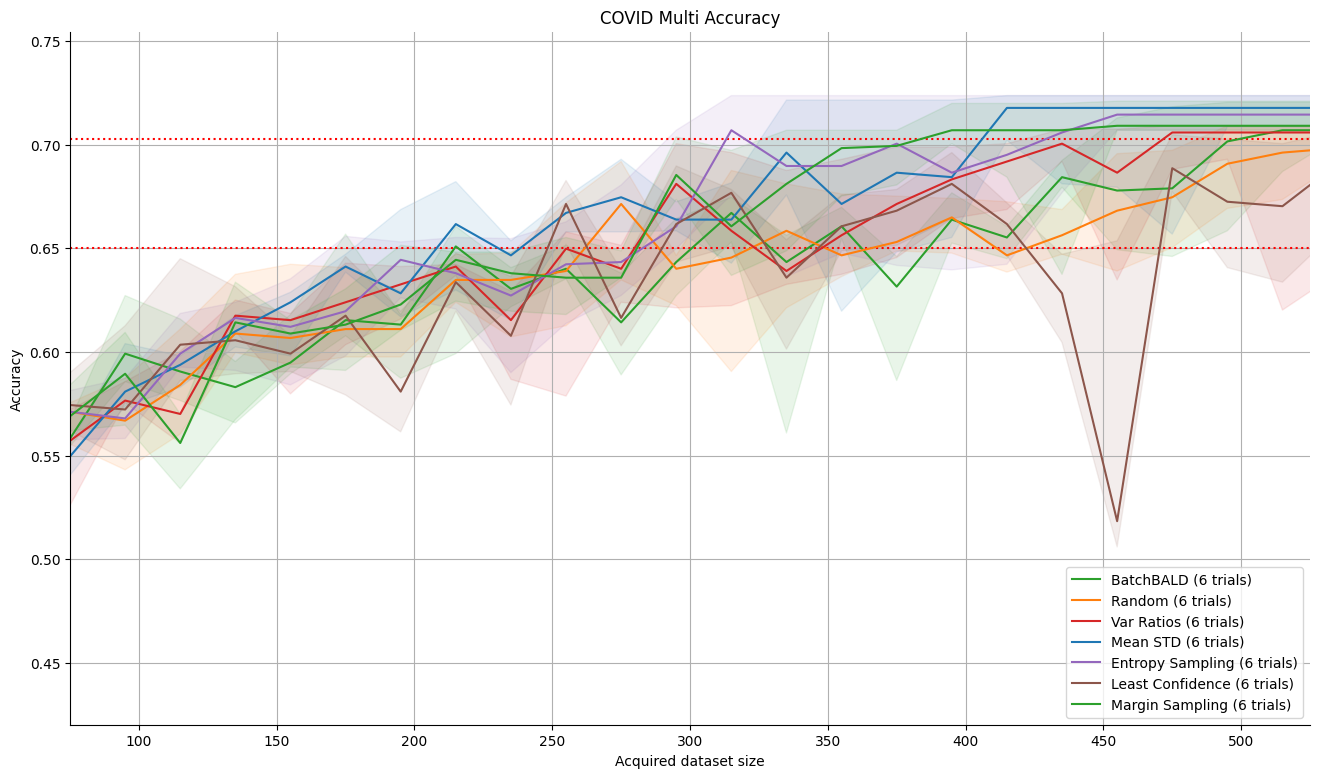

BatchBALD (6 trials):
65.0% at [175 195 275]
69.4% at [435 475 495]
Random (6 trials):
65.0% at [235. 255. 335.]
69.4% at [515. 655.  inf]
Var Ratios (6 trials):
65.0% at [255 275 375]
69.4% at [275 415 475]
Mean STD (6 trials):
65.0% at [175 175 255]
69.4% at [315 315 475]
Entropy Sampling (6 trials):
65.0% at [175. 195. 295.]
69.4% at [275. 295. 555.]
Least Confidence (6 trials):
65.0% at [215 235 295]
69.4% at [435 515 615]
Margin Sampling (6 trials):
65.0% at [195. 235. 275.]
69.4% at [315. 375. 695.]


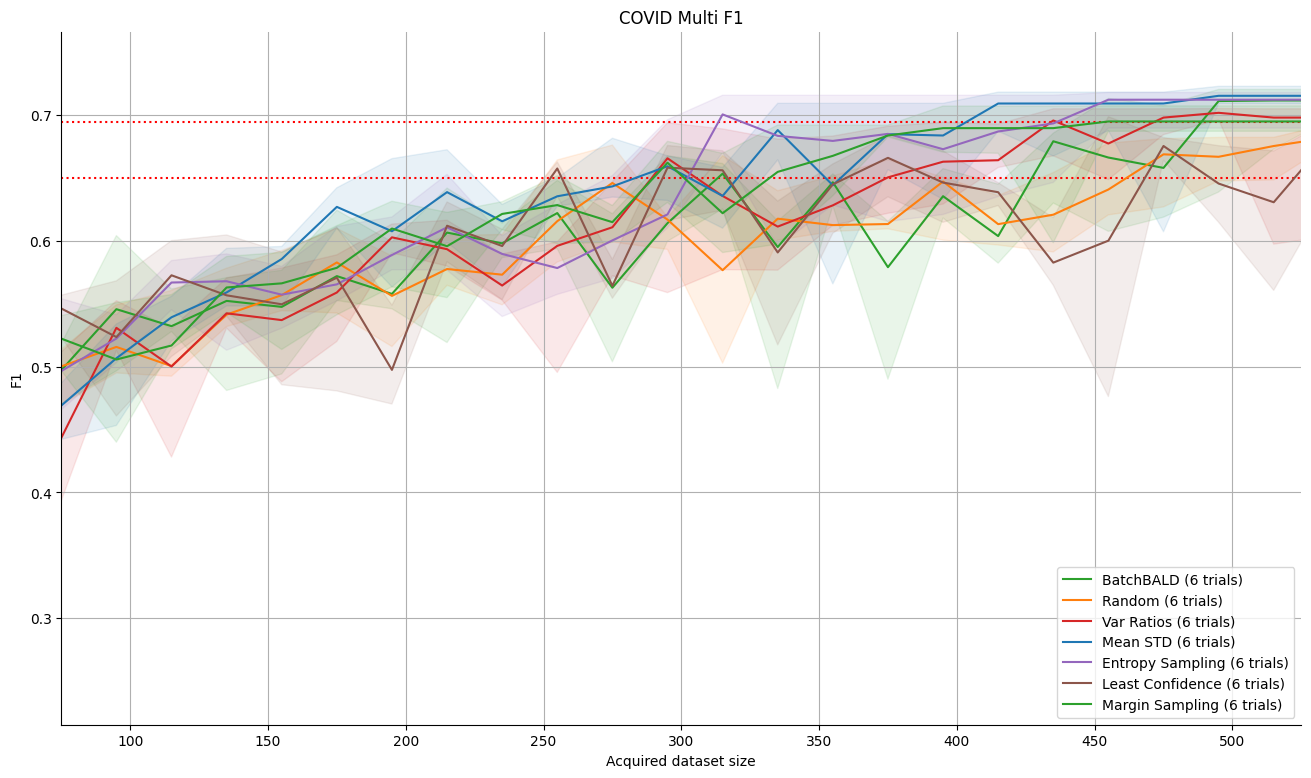

BatchBALD (6 trials):
70.0% at [195. 295. 375.]
73.51% at [475. 575.  inf]
Random (6 trials):
70.0% at [135. 255. 495.]
73.51% at [475.  inf  inf]
Var Ratios (6 trials):
70.0% at [155. 235. 335.]
73.51% at [275.  inf  inf]
Mean STD (6 trials):
70.0% at [215. 235. 295.]
73.51% at [315. 315.  inf]
Entropy Sampling (6 trials):
70.0% at [195. 235. 255.]
73.51% at [255. 655.  inf]
Least Confidence (6 trials):
70.0% at [235. 255. 295.]
73.51% at [295. 655.  inf]
Margin Sampling (6 trials):
70.0% at [195. 215. 275.]
73.51% at [375. 435.  inf]


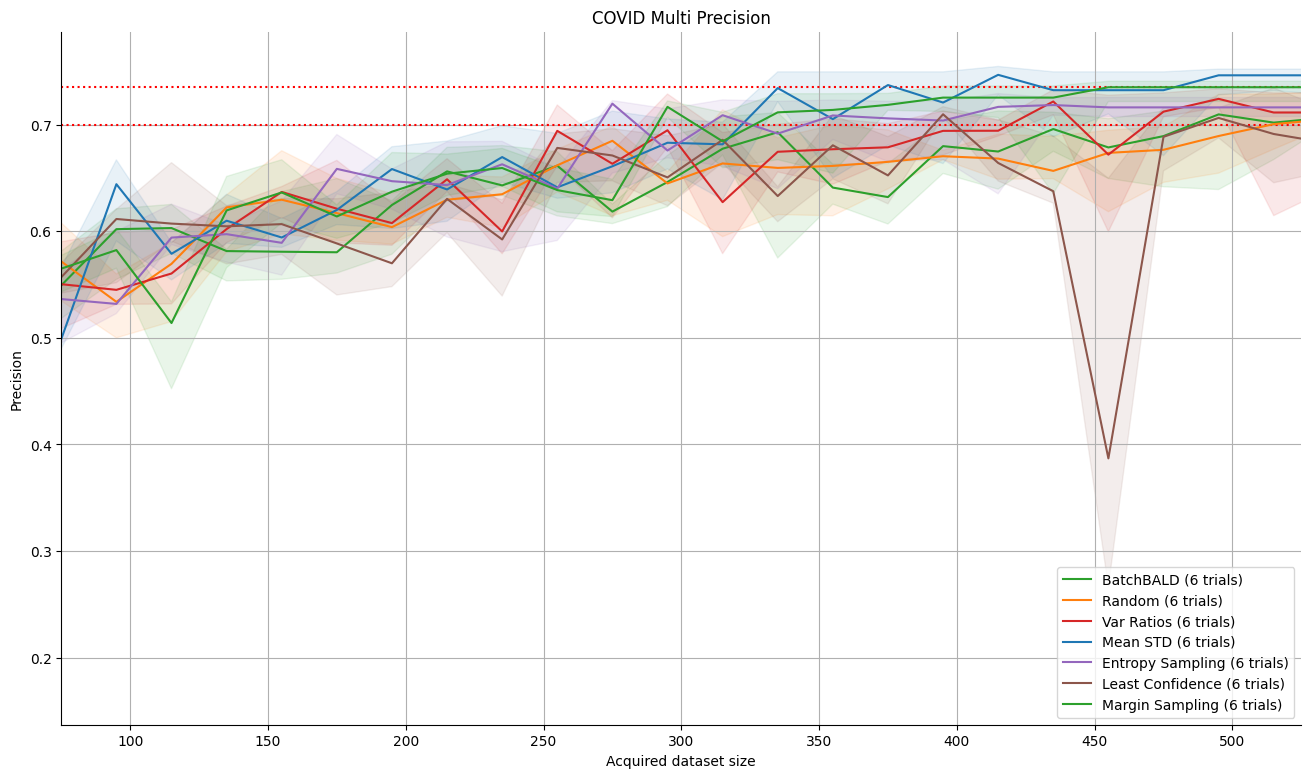

BatchBALD (6 trials):
60.0% at [ 75 135 155]
67.01% at [415 415 435]
Random (6 trials):
60.0% at [135. 155. 235.]
67.01% at [235. 255. 435.]
Var Ratios (6 trials):
60.0% at [135 175 175]
67.01% at [275 295 375]
Mean STD (6 trials):
60.0% at [ 95 155 155]
67.01% at [175 255 315]
Entropy Sampling (6 trials):
60.0% at [ 95 115 155]
67.01% at [235 275 295]
Least Confidence (6 trials):
60.0% at [115 115 195]
67.01% at [275 275 355]
Margin Sampling (6 trials):
60.0% at [155. 155. 195.]
67.01% at [235. 275.  inf]


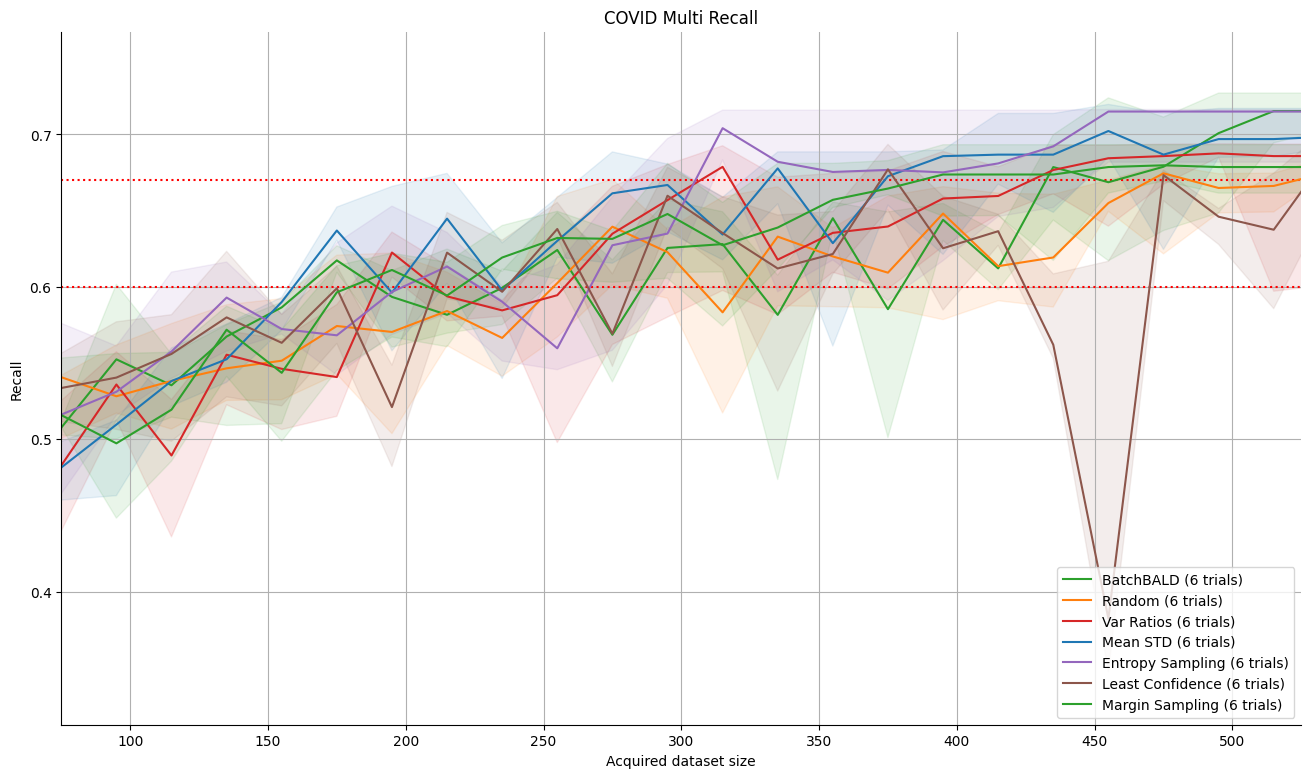

BatchBALD (6 trials):
80.0% at [ 95. 155. 155.]
85.97% at [415. 435. 475.]
Random (6 trials):
80.0% at [115. 155. 195.]
85.97% at [495. 515.  inf]
Var Ratios (6 trials):
80.0% at [155. 175. 215.]
85.97% at [415.  inf  inf]
Mean STD (6 trials):
80.0% at [135. 135. 155.]
85.97% at [275. 315. 395.]
Entropy Sampling (6 trials):
80.0% at [ 75.  95. 175.]
85.97% at [275. 295. 555.]
Least Confidence (6 trials):
80.0% at [ 95 155 235]
85.97% at [355 435 535]
Margin Sampling (6 trials):
80.0% at [115. 135. 155.]
85.97% at [275. 315.  inf]


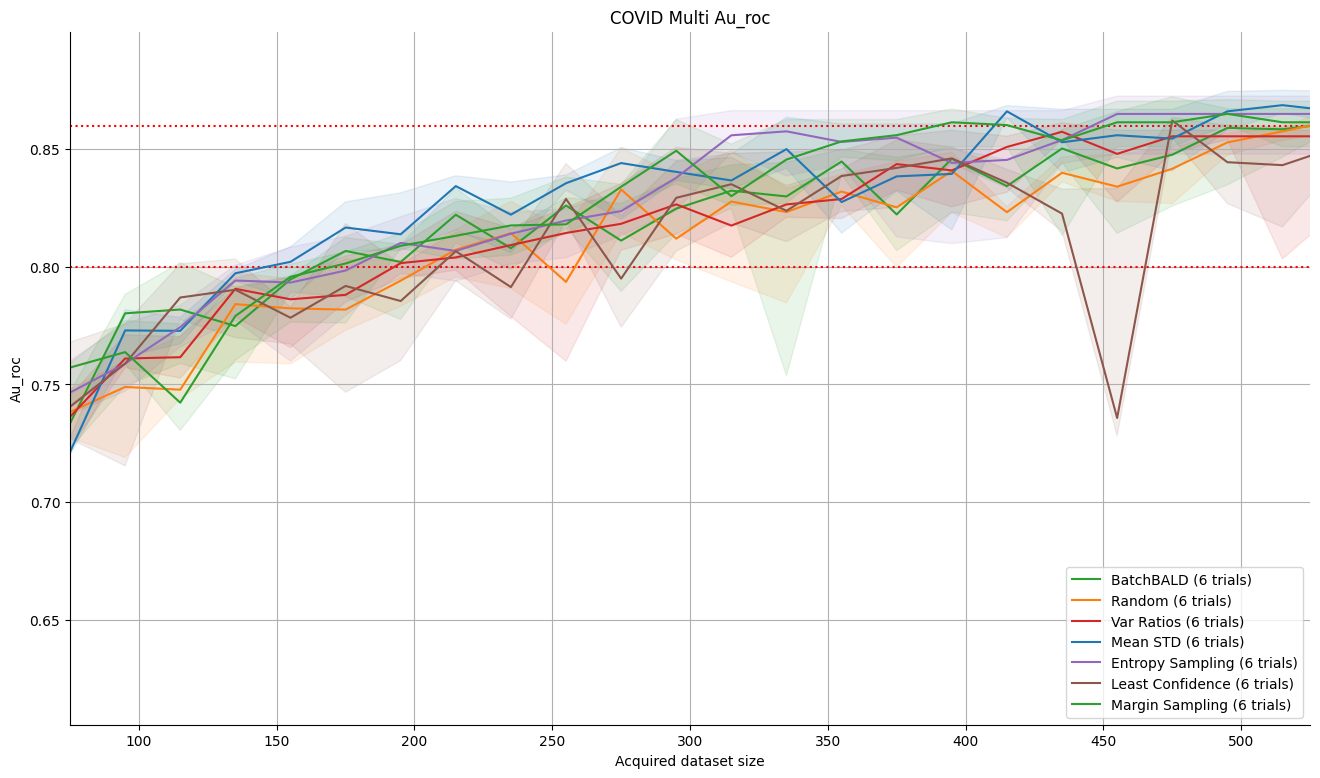

BatchBALD (6 trials):
70.0% at [175 235 255]
75.26% at [335 375 435]
Random (6 trials):
70.0% at [135. 215. 295.]
75.26% at [255. 355.  inf]
Var Ratios (6 trials):
70.0% at [175. 215. 275.]
75.26% at [415. 455.  inf]
Mean STD (6 trials):
70.0% at [155. 155. 195.]
75.26% at [275. 315. 395.]
Entropy Sampling (6 trials):
70.0% at [155. 195. 255.]
75.26% at [275. 295. 435.]
Least Confidence (6 trials):
70.0% at [155 195 295]
75.26% at [275 315 455]
Margin Sampling (6 trials):
70.0% at [175. 175. 215.]
75.26% at [275. 315. 395.]


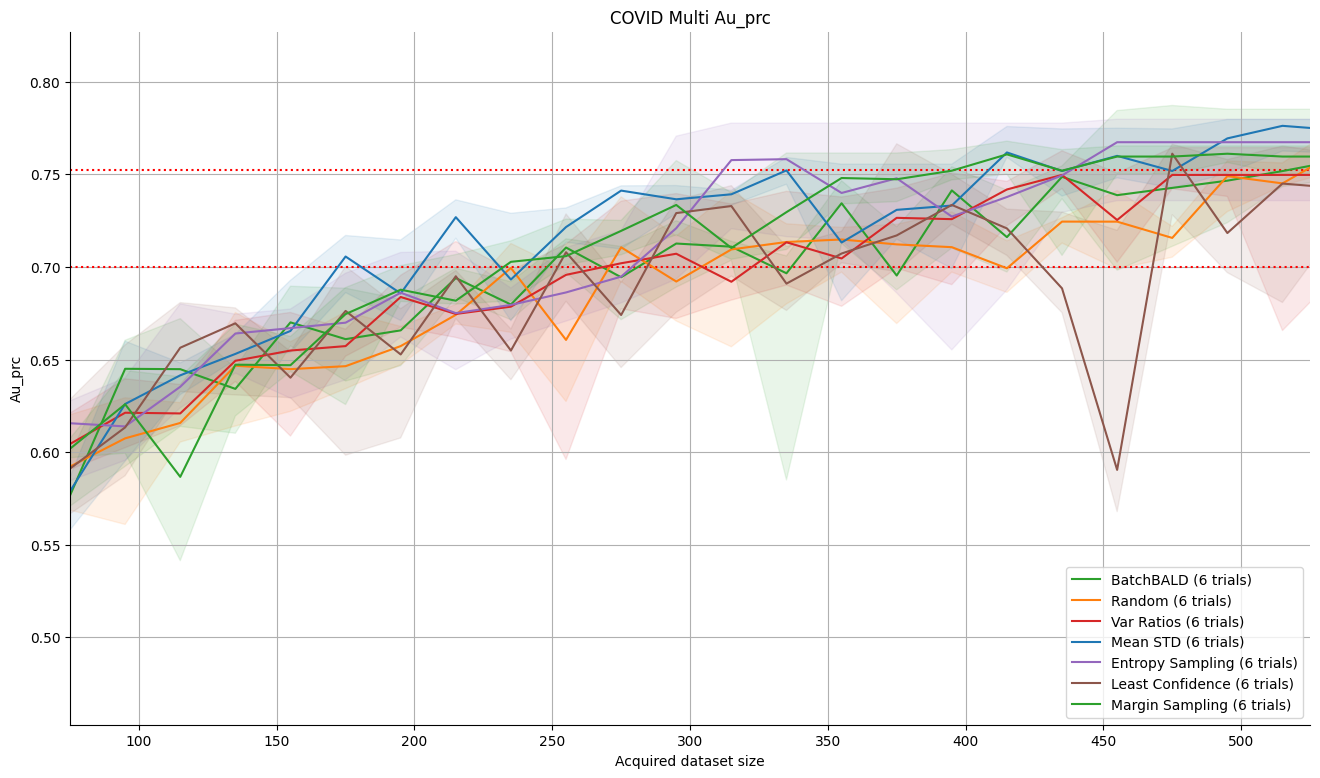

BatchBALD (6 trials):
50.0% at [0 0 0]
55.65% at [0 0 0]
Random (6 trials):
50.0% at [0 0 0]
55.65% at [0 0 0]
Var Ratios (6 trials):
50.0% at [0 0 0]
55.65% at [0 0 0]
Mean STD (6 trials):
50.0% at [0 0 0]
55.65% at [0 0 0]
Entropy Sampling (6 trials):
50.0% at [0 0 0]
55.65% at [0 0 0]
Least Confidence (6 trials):
50.0% at [0 0 0]
55.65% at [0 0 0]
Margin Sampling (6 trials):
50.0% at [0 0 0]
55.65% at [0 0 0]


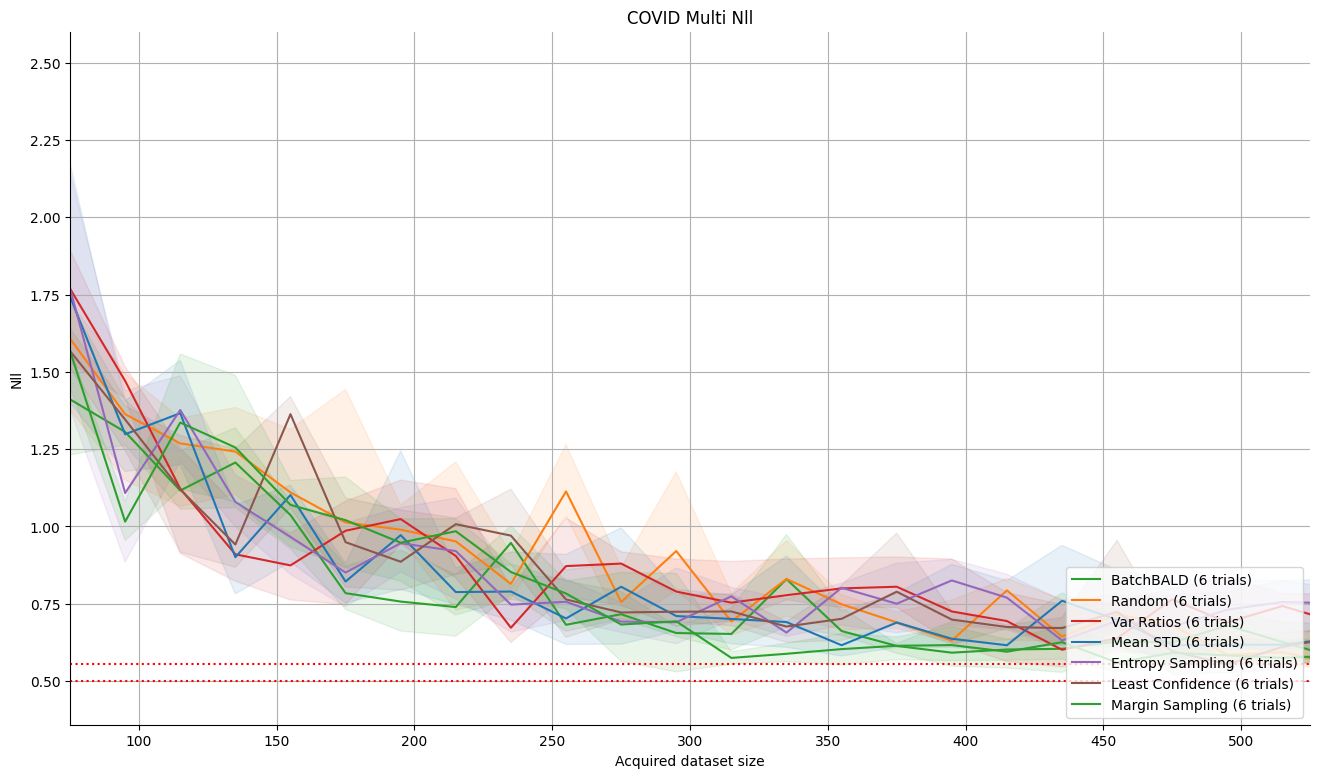

BatchBALD (6 trials):
60.0% at [ 75 135 155]
67.01% at [415 415 435]
Random (6 trials):
60.0% at [135. 155. 235.]
67.01% at [235. 255. 435.]
Var Ratios (6 trials):
60.0% at [135 175 175]
67.01% at [275 295 375]
Mean STD (6 trials):
60.0% at [ 95 155 155]
67.01% at [175 255 315]
Entropy Sampling (6 trials):
60.0% at [ 95 115 155]
67.01% at [235 275 295]
Least Confidence (6 trials):
60.0% at [115 115 195]
67.01% at [275 275 355]
Margin Sampling (6 trials):
60.0% at [155. 155. 195.]
67.01% at [235. 275.  inf]


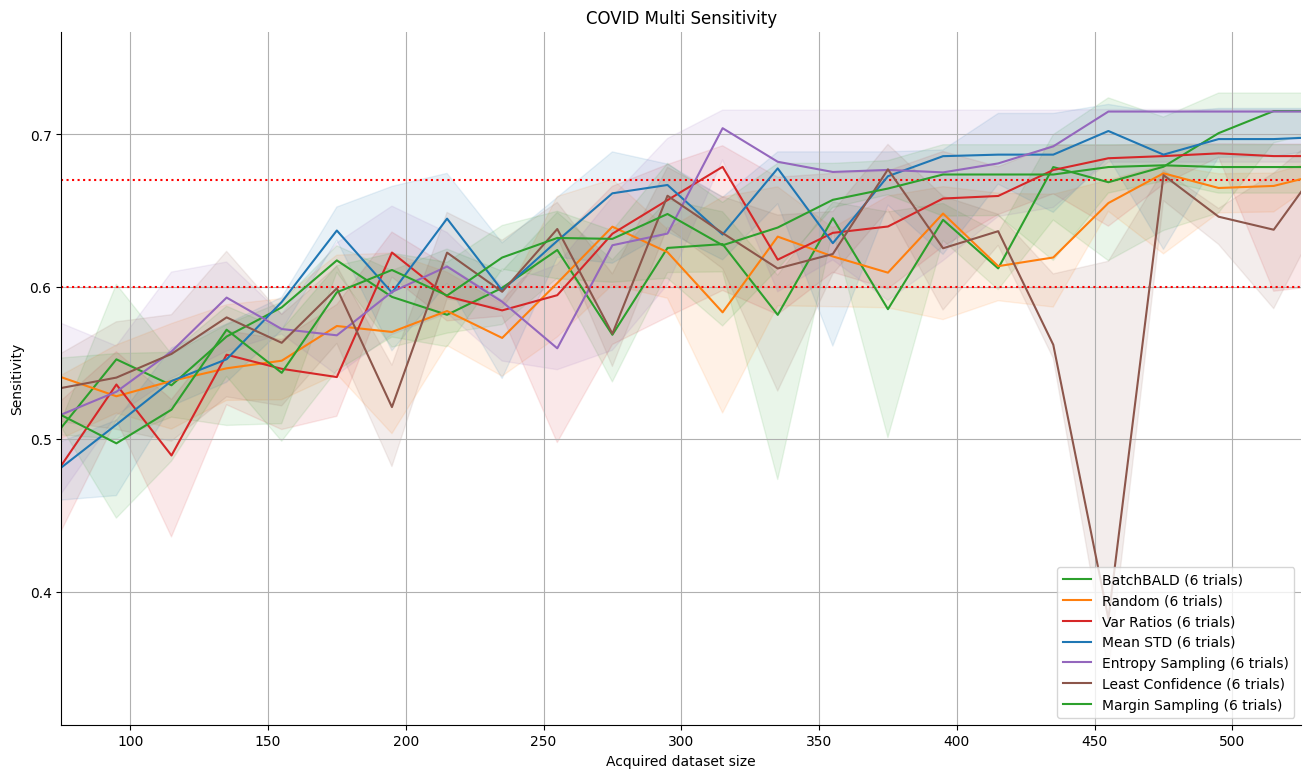

BatchBALD (6 trials):
75.0% at [ 0 75 95]
82.36% at [375 415 435]
Random (6 trials):
75.0% at [75 75 75]
82.36% at [295 355 475]
Var Ratios (6 trials):
75.0% at [ 0 75 95]
82.36% at [275 415 575]
Mean STD (6 trials):
75.0% at [75 75 95]
82.36% at [195 255 395]
Entropy Sampling (6 trials):
75.0% at [ 0  0 75]
82.36% at [275 295 435]
Least Confidence (6 trials):
75.0% at [ 0  0 75]
82.36% at [375 435 515]
Margin Sampling (6 trials):
75.0% at [ 0  0 75]
82.36% at [235 275 375]


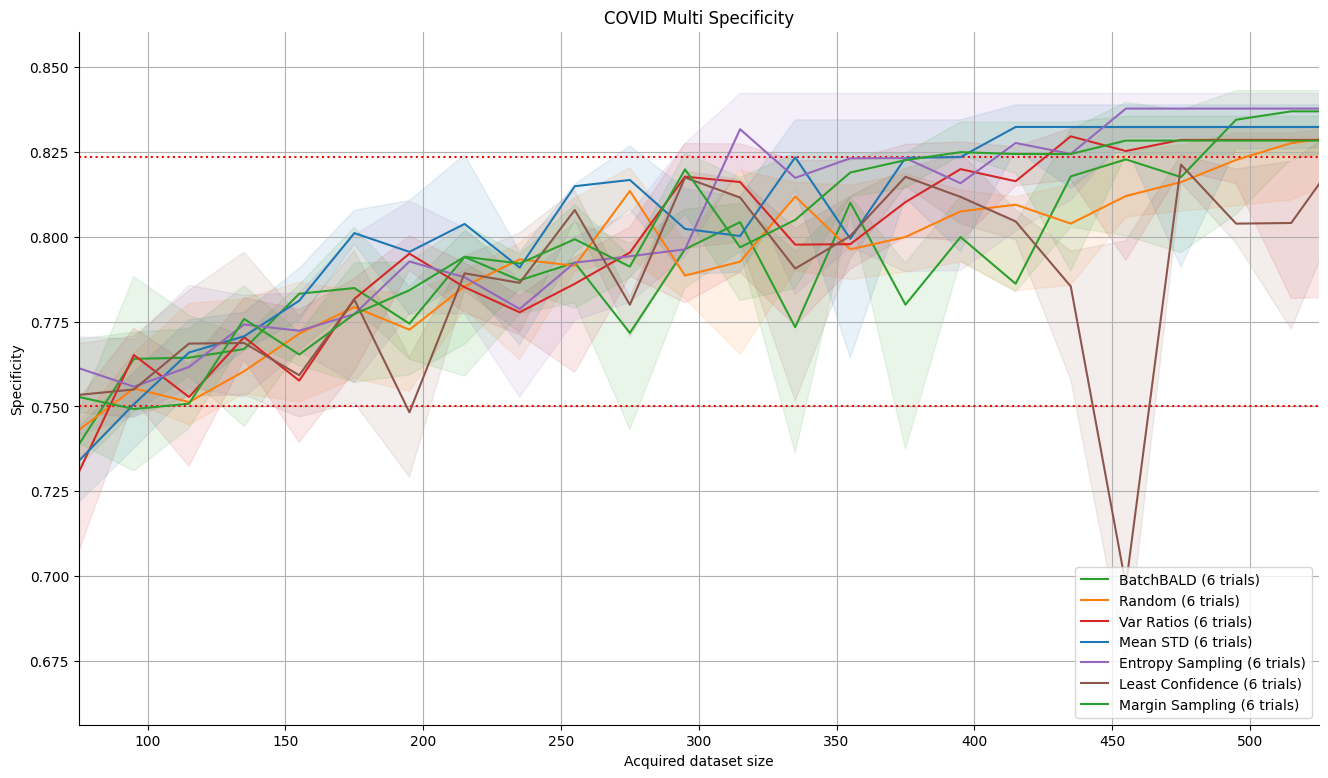

In [26]:
for show_b in (10, ):
    def filter_exps(name, store):
        vip_args = rl.get_vip_args(store)
        if vip_args.nis == 0:
            return False
        if (vip_args.am, vip_args.af) in [
            (AcquisitionMethod.multibald, AcquisitionFunction.bald),
            (AcquisitionMethod.independent, AcquisitionFunction.random),
            (AcquisitionMethod.independent, AcquisitionFunction.mean_stddev),
            (AcquisitionMethod.independent, AcquisitionFunction.variation_ratios),
            (AcquisitionMethod.independent, AcquisitionFunction.entropy_sampling),
            (AcquisitionMethod.independent, AcquisitionFunction.least_confidence),
            (AcquisitionMethod.independent, AcquisitionFunction.margin_sampling)
        ]:
            return True
        if vip_args.af != AcquisitionFunction.random:
            if vip_args.k not in (10, ) or vip_args.b not in (show_b, ):
                return False
        return True

    filtered = rl.filter_dict(stores, kv=filter_exps)
    pp.pprint(rl.diff_args(filtered))

    def key2text(name, store):
        vip_args = rl.get_vip_args(store)
        am, af = vip_args.am, vip_args.af
        key_map = {
            (AcquisitionMethod.independent, AcquisitionFunction.random): 'Random',
            (AcquisitionMethod.independent, AcquisitionFunction.bald): 'BALD',
            (AcquisitionMethod.independent, AcquisitionFunction.variation_ratios): 'Var Ratios',
            (AcquisitionMethod.independent, AcquisitionFunction.mean_stddev): 'Mean STD',
            (AcquisitionMethod.multibald, AcquisitionFunction.bald): 'BatchBALD',
            (AcquisitionMethod.independent, AcquisitionFunction.entropy_sampling): 'Entropy Sampling',
            (AcquisitionMethod.independent, AcquisitionFunction.least_confidence): 'Least Confidence',
            (AcquisitionMethod.independent, AcquisitionFunction.margin_sampling): 'Margin Sampling'
        }
        return key_map.get((am, af), ValueError(vip_args))

    grouped_by = rl.groupby_dict(filtered, key_kv=key2text)
    pp.pprint(rl.map_dict(grouped_by, v=lambda stores: rl.get_stores_info(stores)))

    metrics = {
        'accuracy': rl.aggregate_accuracies,
        'f1': rl.aggregate_f1,
        'precision': rl.aggregate_precision,
        'recall': rl.aggregate_recall,
        'AU_ROC': rl.aggregate_auroc,
        'AU_PRC': rl.aggregate_auprc,
        'nll': rl.aggregate_loss,
        'sensitivity': rl.aggregate_sensitivity,
        'specificity': rl.aggregate_specificity
    }
    thresholds = {
        'accuracy': (lower_multi_baseline['accuracy'], multi_baseline['accuracy']),
        'f1': (lower_multi_baseline['f1'], multi_baseline['f1']),
        'precision': (lower_multi_baseline['precision'], multi_baseline['precision']),
        'recall': (lower_multi_baseline['recall'], multi_baseline['recall']),
        'AU_ROC': (lower_multi_baseline['ROC_AUC'], multi_baseline['ROC_AUC']),
        'AU_PRC': (lower_multi_baseline['PRC_AUC'], multi_baseline['PRC_AUC']),
        'nll': (lower_multi_baseline['nll'], multi_baseline['nll']),
        'sensitivity': (lower_multi_baseline['recall'], multi_baseline['recall']),
        'specificity': (lower_multi_baseline['specificity'], multi_baseline['specificity'])
    }

    grouped_by_metric = {metric: rl.map_dict(grouped_by, v=lambda stores: func(stores, thresholds=thresholds[metric])) for metric, func in metrics.items()}
    acquisition_functions_list = ['BatchBALD', 'Random', 'Var Ratios', 'Mean STD', 'Entropy Sampling', 'Least Confidence', 'Margin Sampling']

    sorted_dicts = {metric: {key: grouped_by_metric[metric][key] for key in acquisition_functions_list} for metric in metrics}

    figsize = (16, 9)

    for metric in metrics:
        plt.figure(figsize=figsize)
        alp.plot_aggregated_groups(sorted_dicts[metric], show_num_trials=True, show_quantiles=False, show_thresholds=True)
        
        # Get the min and max y values for the current metric
        # Stacking accuracies for each key
        y_values = np.array([])
        for key, value in sorted_dicts[metric].items():
            accuracies_list = value.accuracies
            y_values = np.append(y_values, np.hstack(accuracies_list))
        y_values = np.where(y_values==0, np.nan, y_values)
        if metric == 'loss' or metric == 'nll':
            y_values = np.where(y_values==np.nanmax(y_values), np.nan, y_values)
        min_y = np.nanmin(y_values)
        max_y = np.nanmax(y_values)
        
        # Set the y-axis limits dynamically
        y_margin = 0.05 * (max_y - min_y)
        plt.axis([75, 525, min_y - y_margin, max_y + y_margin])
        
        acc_label_axes(metric=metric.capitalize())
        plt.grid(True)
        plt.legend(loc='lower right')
        plt.title(f'COVID Multi {metric.capitalize()}')
        output_path = blackhc.notebook.original_dir + f'/COVID_multi_{metric}.png'
        alp.plot_save(output_path, dpi=300)
        plt.show()
